I just read a theoretical paper where authors report an Anova. This case nicely illustrates the general redundancy of Anova so I wanted to share it. Trueblood, Brown and Heathcote (2014) report a computational model that predicts similarity effect. Similarity effect is a label for the following judgment pattern: Subjects are given two options X and Y. X and Y are equally attractive and are chosen by subjects equally often. Then a third option Z is added. Z is similar to X but not so attractive. With addition of Z X is chosen more often than Y. This is the similarity effect. The authors refer to X as the focal option, while Y is nonfocal and they call Z decoy.

Their model (MLBA) predicts that similarity effect decreases with time pressure. An earlier model (MDFT) makes the same prediction with some parameters but it can also predict a decrease in similarity effect for different parameter set. They wanted to compare the predictions of the two models to the human data. They conducted the following experiment. The subject was asked to choose from one of three options (focal, non-focal and decoy). The time pressure for the choice was varied - there were three conditions with time pressure 1, 2 and 5 seconds. Below I roughly replot the results (their figure 5). Errorbars show the 95% CI.

Populating the interactive namespace from numpy and matplotlib


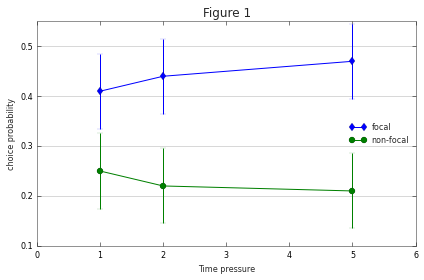

In [5]:
%pylab inline
x=[1,2,5]
y=np.array([[0.41,0.44,0.47],[0.25,0.22,0.21]]).T
plt.errorbar(x,y[:,0],yerr=0.7/9.3,fmt='d-b')
plt.errorbar(x,y[:,1],yerr=0.7/9.3,fmt='o-g')
plt.legend(['focal','non-focal'],loc=7)
plt.grid(False,axis='x')
plt.xlabel('Time pressure');plt.ylabel('choice probability')
plt.title('Figure 1')
plt.xlim([0,6]);

The figure shows the choice probabilities for two of the options - focal and nonfocal. (Since the choice probabilities sum to one, the probability of the third option is determined by the other two.) Then comes the Anova:

>To analyze the data, we conducted a 2 (context) $\times$ 3(deliberation time) repeated-measures analysis of variance. The
dependent variable was the percentage of times that a subject chose an option (focal or nonfocal). A main effect of context, $F(1,
45) = 95.76, p \lt .001$, indicated that participants preferred the focal option to the nonfocal option, demonstrating a strong similarity effect. 

Let's hold on there. Main effect only tells us that the groups are different, it does not tell us how they differ. That's why Anova is usually followed by pair-wise post-hoc tests. Ok, in this case, it is kind of obvious. We only have two groups and from figure 1 we see that focal option shows higher choice probability across all time pressure levels.

> There was no significant main effect of deliberation time, $F(2, 90) = 1.25, p = .29$.

This doesn't tell us anything, since we can't know whether the effect does not exist or our sample size was too small to detect a significant effect. 

> However, the interaction of context by deliberation was significant, $F(2, 90) = 7.51, p \lt .001$, indicating that the similarity effect increases with longer deliberation times as predicted by the MLBA model.

Again all that the significant interaction indicates is that the averages of the six groups are different from what a linear null model with main effect (ME) of context and time pressure ME would predict. If you are not sure what the predictions of this null model look like here is a plot:

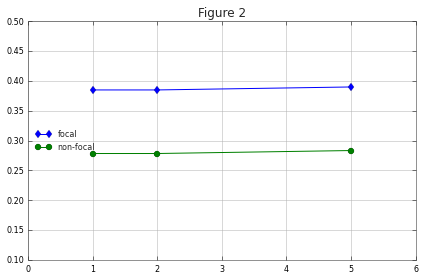

In [2]:
py=np.atleast_2d(y.mean(0))+np.atleast_2d(y.mean(1)).T
py/=2.
plt.plot(x,py[:,0],'d-b')
plt.plot(x,py[:,1],'o-g')
plt.legend(['focal','non-focal'],loc=6)
plt.xlim([0,6]);plt.ylim([0.1,0.5])
plt.title('Figure 2');

The context ME dominates the predictions of this model but the time pressure ME also makes contribution.

Anyway, the significant interaction certainly does NOT indicate that the similarity effect increases with deliberation time. For instance the following interactions are also significant (+ their context ME is significant while the time-pressure ME is not). Yet they clearly do not indicate a similarity effect increase.  

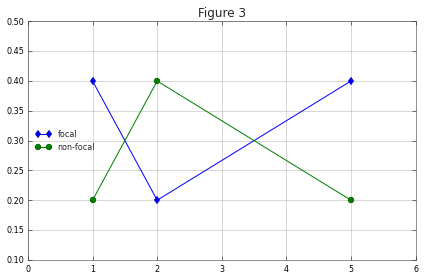

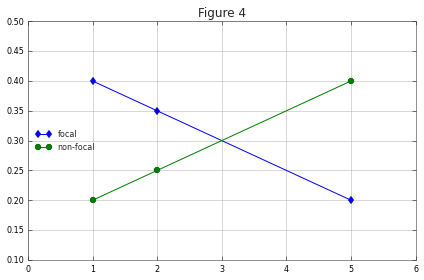

In [3]:
plt.plot(x,[0.4,0.2,0.4],'d-b')
plt.plot(x,[0.2,0.4,0.2],'o-g')
plt.legend(['focal','non-focal'],loc=6)
plt.xlim([0,6]);plt.ylim([0.1,0.5])
plt.title('Figure 3')
plt.figure()
plt.plot(x,[0.4,0.35,0.2],'d-b')
plt.plot(x,[0.2,0.25,0.4],'o-g')
plt.legend(['focal','non-focal'],loc=6)
plt.xlim([0,6]);plt.ylim([0.1,0.5])
plt.title('Figure 4');

Usually this situation is handled by post-hoc tests. As the errorbars in the figure indicate, the differences between the time pressure conditions within each group are not significant, so (unless we repeat the experiment with bigger sample size) we can't reliably tell where the interaction comes from. 

Putting the problems of small sample size aside, Anova suffers from a principal problem that it doesn't test the question that the authors are interested in. The authors are interested whether the data conform to the predictions of the MLBA model. The model shows a random choice when the time pressure is high and exponential convergence to the similarity effect with decreasing time pressure. The MDFT model predicts decreasing similarity effect with decreasing time pressure. We wish to test whether the choice probabilities are monotonically decreasing/increasing in the nonfocal/focal condition and vice versa. Instead we test whether the group means are different from the  linear additive model in figure 3. 

One might argue that model in figure 3 lies between the two hypotheses - the similarity effect in figure 3 is neither increasing or decreasing, it is constant. So, the argument goes, once we obtained the significant interaction we can look at figure 1 to see whether the rejected hypothesis lies north or south of the null model. This argument still leaves out the fact that the alternative hypothesis ("something reliably different from null", see figure 3 and 4) is not what we are looking for. Let me illustrate why this is a problem. 

Consider the following result pattern. 

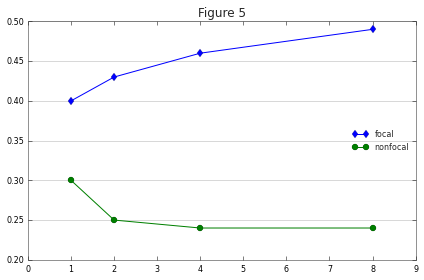

In [4]:
plt.figure()
x=[1,2,4,8]
plt.plot(x,[0.4,0.43,0.46,0.49],'d-b')
plt.plot(x,[0.3,0.25,0.24,0.24],'o-g')
plt.legend(['focal','nonfocal'],loc=7)
plt.xlim([0,9]);plt.grid(False,axis='x')
plt.title('Figure 5');

Here we observe two kinds of interaction. First, the increasing similarity effect in which we are interested. Second, the faster convergence in the nonfocal condition. Presumably we are not interested in this one, at least not in the current analysis. Unfortunately, Anova can't distinguish the two kinds of interactions and we don't know which interaction is driving the significant result. In particular we don't know if the interaction due to similarity effect would reach significance if the interaction due to faster convergence were absent. 

There are several simple alternatives to Anova. How about this one: We fit a separate quadratic model to the data in each context condition. We report the slope magnitude along with its CI. If the slope is reliably (zero outside the CI) positive in the focal condition and reliably negative in the nonfocal condition, then we are done.

Another option would be to refer the reader directly to figure 1. We made heavy use of this figure in the proces of decyphering the results of Anova. Why then, not simply drop Anova and use the figure instead. Nothing would be lost with this omission. 